# Aprendizado de Máquina - Atividade do primeiro semestre
### Bloco 1

O target numérico é a largura do bico, que será prevista a partir de parâmetros como a profundidade desse bico, massa corporal, etc. Um futuro target categórico pode ser a espécie do pinguim.

In [1]:
import seaborn as sns

df = sns.load_dataset('penguins')
print(df.dtypes)
#print(df)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [2]:
# importa a biblioteca para plotar os gráficos
import matplotlib.pyplot as plt

In [3]:
# Converte os dados
df = df.convert_dtypes() 
print(df.dtypes)
#print(df)

species               string
island                string
bill_length_mm       Float64
bill_depth_mm        Float64
flipper_length_mm      Int64
body_mass_g            Int64
sex                   string
dtype: object


In [4]:
# Elimina as linhas que possuem lacunas sem dados
dfcopia = df.copy()
dfcopia = dfcopia.dropna(axis=0)

#print(dfcopia)


In [5]:
# Cria um dataset somente com os features numéricos
features_numericos = ["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df_numericos = dfcopia[features_numericos]

print(df_numericos)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7                181         3750
1              39.5           17.4                186         3800
2              40.3           18.0                195         3250
4              36.7           19.3                193         3450
5              39.3           20.6                190         3650
..              ...            ...                ...          ...
338            47.2           13.7                214         4925
340            46.8           14.3                215         4850
341            50.4           15.7                222         5750
342            45.2           14.8                212         5200
343            49.9           16.1                213         5400

[333 rows x 4 columns]


In [6]:
df_normalizado = df_numericos.copy()

#normalizando coluna por coluna com o método de mínimo e máximo:

#primeira coluna (comprimento do bico)
maximo_bill_length = df_normalizado['bill_length_mm'].max()
minimo_bill_length = df_normalizado['bill_length_mm'].min()

df_normalizado['bill_length_norm'] = (df_normalizado['bill_length_mm'] - minimo_bill_length) / (maximo_bill_length - minimo_bill_length)

#segunda coluna (profundidade do bico)
maximo_bill_depth = df_normalizado['bill_depth_mm'].max()
minimo_bill_depth = df_normalizado['bill_depth_mm'].min()

df_normalizado['bill_depth_norm'] = (df_normalizado['bill_depth_mm'] - minimo_bill_depth) / (maximo_bill_depth - minimo_bill_depth)

#terceira coluna (envergadura das nadadeiras)
maximo_flipper_length = df_normalizado['flipper_length_mm'].max()
minimo_flipper_length = df_normalizado['flipper_length_mm'].min()

df_normalizado['flipper_length_norm'] = (df_normalizado['flipper_length_mm'] - minimo_flipper_length) / (maximo_flipper_length - minimo_flipper_length)

#quarta coluna (peso corporal)
maximo_body_mass = df_normalizado['body_mass_g'].max()
minimo_body_mass = df_normalizado['body_mass_g'].min()

df_normalizado['body_mass_norm'] = (df_normalizado['body_mass_g'] - minimo_body_mass) / (maximo_body_mass - minimo_body_mass)
#print(df_normalizado)

#criando um novo dataframe só com os dados normalizados.
df_normalizado2 = df_normalizado.reindex(["bill_length_norm","bill_depth_norm","flipper_length_norm","body_mass_norm"],axis=1)

print(df_normalizado2)

     bill_length_norm  bill_depth_norm  flipper_length_norm  body_mass_norm
0            0.254545         0.666667             0.152542        0.291667
1            0.269091         0.511905             0.237288        0.305556
2            0.298182         0.583333             0.389831        0.152778
4            0.167273         0.738095             0.355932        0.208333
5            0.261818         0.892857             0.305085        0.263889
..                ...              ...                  ...             ...
338          0.549091         0.071429             0.711864        0.618056
340          0.534545         0.142857             0.728814        0.597222
341          0.665455         0.309524             0.847458        0.847222
342          0.476364         0.202381             0.677966        0.694444
343          0.647273         0.357143             0.694915            0.75

[333 rows x 4 columns]


In [7]:
# análises exploratória e estatística dos dados:

print(df_normalizado2.shape) # checando o tamanho do dataframe (333 linhas e 4 colunas)
print(df_normalizado2.index) # nota-se que o index não está ordenado, apresentando lacunas.

(333, 4)
Int64Index([  0,   1,   2,   4,   5,   6,   7,  12,  13,  14,
            ...
            332, 333, 334, 335, 337, 338, 340, 341, 342, 343],
           dtype='int64', length=333)


In [8]:
# para resolver esse problema, utiliza-se o método reset_index:
df_arrumado = df_normalizado2.reset_index(drop=True) # no qual drop=True significa que a nova coluna index irá substituir a anterior completamente,
# ao invés de apenas ser acrescentada como mais uma coluna.

# Floresta aleatória:

Nesta seção será testado o método de floresta aleatória, que consiste na formação de diversas árvores de decisão de maneira aleatória.

In [212]:
# ----- Carregando os dados e definindo parâmetros:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455
FEATURES = ["bill_depth_norm", "flipper_length_norm", "body_mass_norm"]
TARGET = ["bill_length_norm"]

df = df_arrumado

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size = TAMANHO_TESTE, random_state = SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# o .values utiliza apenas os valores, em forma de array
x_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
x_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [213]:
# ----- Criando e treinando o modelo:
from sklearn.ensemble import RandomForestRegressor

# alterando o target:
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

(299, 1) (34, 1)
(299,) (34,)


In [214]:
# criando o modelo:
modelo_rf = RandomForestRegressor(random_state = SEMENTE_ALEATORIA)

# treinando o modelo:
modelo_rf.fit(x_treino, y_treino)

# primeira previsão com o modelo:
previsao = modelo_rf.predict(x_teste)
print()
print(previsao)


[0.37767273 0.26850909 0.43301818 0.54188788 0.24461818 0.45598061
 0.27843636 0.17246667 0.31436364 0.29538182 0.30443636 0.28090909
 0.36992727 0.69323636 0.41847273 0.16952727 0.44374545 0.23018182
 0.65370909 0.35970909 0.27683636 0.3216     0.48705455 0.52385455
 0.49494545 0.25654545 0.51141818 0.67309091 0.75541818 0.46247273
 0.17381818 0.28178182 0.24025455 0.42501818]


In [215]:
# Finalmente, checando a performance da primeira previsão:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = previsao

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared = False)

print(f"O RMSE do modelo floresta aleatória sem alteração nos hiperparâmetros foi de {RMSE} mm normalizados (?).")


O RMSE do modelo floresta aleatória sem alteração nos hiperparâmetros foi de 0.1588771160559477 mm normalizados (?).


In [216]:
# ----- Definindo os hiperparâmetros:
from itertools import product
from sklearn.metrics import r2_score

NUM_ARVORES = [50, 100, 300]
NUM_FOLHAS = [10, 15]
NUM_PROFUNDIDADE = [5, 10]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    MSE = mean_squared_error(y_verdadeiro, y_previsao)
    R2 = r2_score(y_verdadeiro, y_previsao)

    print(
        f"O RMSE do modelo RF usando\n"
        f"n_estimators={n_arvores}, max_leaf_nodes={n_folhas}\n"
        f"e max_depth={n_profundidade} foi de {RMSE:.2f} mm normalizados.\n"
        f"O MSE foi de {MSE:.2f} mm normalizados.\n"
        f"O R2 foi de {R2:.2f} mm normalizados."
        "\n"
    )

O RMSE do modelo RF usando
n_estimators=50, max_leaf_nodes=10
e max_depth=5 foi de 0.15 mm normalizados.
O MSE foi de 0.02 mm normalizados.
O R2 foi de 0.41 mm normalizados.

O RMSE do modelo RF usando
n_estimators=100, max_leaf_nodes=10
e max_depth=5 foi de 0.15 mm normalizados.
O MSE foi de 0.02 mm normalizados.
O R2 foi de 0.41 mm normalizados.

O RMSE do modelo RF usando
n_estimators=300, max_leaf_nodes=10
e max_depth=5 foi de 0.14 mm normalizados.
O MSE foi de 0.02 mm normalizados.
O R2 foi de 0.42 mm normalizados.

O RMSE do modelo RF usando
n_estimators=50, max_leaf_nodes=10
e max_depth=10 foi de 0.15 mm normalizados.
O MSE foi de 0.02 mm normalizados.
O R2 foi de 0.41 mm normalizados.

O RMSE do modelo RF usando
n_estimators=100, max_leaf_nodes=10
e max_depth=10 foi de 0.15 mm normalizados.
O MSE foi de 0.02 mm normalizados.
O R2 foi de 0.41 mm normalizados.

O RMSE do modelo RF usando
n_estimators=300, max_leaf_nodes=10
e max_depth=10 foi de 0.14 mm normalizados.
O MSE foi de 

Para essa seed, os hiperparâmetros de melhor performance foram:
* 300, 10, 5
* 300, 10, 10
* 100, 15, 10
* 300, 15, 10

Sendo assim, pode-se escolher outra seed aleatória e testar novamente esse mesmos números, de modo a descobrir os melhores hiperparâmetros em comum.

In [217]:
# ----- redefinindo parâmetros:

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 40182
FEATURES = ["bill_depth_norm", "flipper_length_norm", "body_mass_norm"]
TARGET = ["bill_length_norm"]

df = df_arrumado

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size = TAMANHO_TESTE, random_state = SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# o .values utiliza apenas os valores, em forma de array
x_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
x_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [218]:
# ----- Criando e treinando o modelo:
from sklearn.ensemble import RandomForestRegressor

# alterando o target:
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

(299, 1) (34, 1)
(299,) (34,)


In [219]:
# criando o modelo:
modelo_rf = RandomForestRegressor(random_state = SEMENTE_ALEATORIA)

# treinando o modelo:
modelo_rf.fit(x_treino, y_treino)

# primeira previsão com o modelo:
previsao = modelo_rf.predict(x_teste)
print()
print(previsao)


[0.26218182 0.23399394 0.25527273 0.48349091 0.46672727 0.1624
 0.56033939 0.18726667 0.71894545 0.26149091 0.37298182 0.47810909
 0.34287273 0.60767273 0.34403636 0.27116364 0.64927273 0.13512727
 0.21178182 0.22647273 0.1843697  0.44309091 0.54196364 0.55749091
 0.38178182 0.562      0.20730909 0.51808485 0.2185697  0.65636364
 0.51079091 0.23789091 0.53076061 0.23265455]


In [220]:
# Finalmente, checando a performance da primeira previsão:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = previsao

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared = False)

print(f"O RMSE do modelo floresta aleatória sem alteração nos hiperparâmetros foi de {RMSE} mm normalizados (?).")


O RMSE do modelo floresta aleatória sem alteração nos hiperparâmetros foi de 0.17091668041548777 mm normalizados (?).


In [221]:
# ----- Definindo os hiperparâmetros:
from itertools import product
from sklearn.metrics import r2_score

NUM_ARVORES = [50, 100, 300]
NUM_FOLHAS = [10, 15]
NUM_PROFUNDIDADE = [5, 10]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    MSE = mean_squared_error(y_verdadeiro, y_previsao)
    R2 = r2_score(y_verdadeiro, y_previsao)

    print(
        f"O RMSE do modelo RF usando\n"
        f"n_estimators={n_arvores}, max_leaf_nodes={n_folhas}\n"
        f"e max_depth={n_profundidade} foi de {RMSE:.2f} mm normalizados.\n"
        f"O MSE foi de {MSE:.2f} mm normalizados.\n"
        f"O R2 foi de {R2:.2f} mm normalizados."
        "\n"
    )

O RMSE do modelo RF usando
n_estimators=50, max_leaf_nodes=10
e max_depth=5 foi de 0.19 mm normalizados.
O MSE foi de 0.04 mm normalizados.
O R2 foi de -0.21 mm normalizados.

O RMSE do modelo RF usando
n_estimators=100, max_leaf_nodes=10
e max_depth=5 foi de 0.19 mm normalizados.
O MSE foi de 0.03 mm normalizados.
O R2 foi de -0.19 mm normalizados.

O RMSE do modelo RF usando
n_estimators=300, max_leaf_nodes=10
e max_depth=5 foi de 0.18 mm normalizados.
O MSE foi de 0.03 mm normalizados.
O R2 foi de -0.17 mm normalizados.

O RMSE do modelo RF usando
n_estimators=50, max_leaf_nodes=10
e max_depth=10 foi de 0.19 mm normalizados.
O MSE foi de 0.04 mm normalizados.
O R2 foi de -0.23 mm normalizados.

O RMSE do modelo RF usando
n_estimators=100, max_leaf_nodes=10
e max_depth=10 foi de 0.19 mm normalizados.
O MSE foi de 0.04 mm normalizados.
O R2 foi de -0.21 mm normalizados.

O RMSE do modelo RF usando
n_estimators=300, max_leaf_nodes=10
e max_depth=10 foi de 0.19 mm normalizados.
O MSE fo

Para a segunda seed escolhida, os melhores números foram:
* 300, 10, 5

e os piores;
* 50, 15, 10

Até o momento, o melhor conjunto de hiperparâmetros em comum foi:
* 300, 10, 5

Partimos agora para uma terceira seed.

In [222]:
# ----- redefinindo parâmetros:

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 27381
FEATURES = ["bill_depth_norm", "flipper_length_norm", "body_mass_norm"]
TARGET = ["bill_length_norm"]

df = df_arrumado

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size = TAMANHO_TESTE, random_state = SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# o .values utiliza apenas os valores, em forma de array
x_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
x_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [223]:
# ----- Criando e treinando o modelo:
from sklearn.ensemble import RandomForestRegressor

# alterando o target:
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

(299, 1) (34, 1)
(299,) (34,)


In [224]:
# criando o modelo:
modelo_rf = RandomForestRegressor(random_state = SEMENTE_ALEATORIA)

# treinando o modelo:
modelo_rf.fit(x_treino, y_treino)

# primeira previsão com o modelo:
previsao = modelo_rf.predict(x_teste)
print()
print(previsao)


[0.28443636 0.59734545 0.43072727 0.44661818 0.23236364 0.17621818
 0.34472727 0.24218182 0.78887273 0.46712727 0.57181818 0.26149091
 0.28785455 0.48149091 0.28738182 0.14250909 0.56538182 0.65494545
 0.46374545 0.32032727 0.42963636 0.39421818 0.56746667 0.2704
 0.74221818 0.61690909 0.44365212 0.27283636 0.51381818 0.50893939
 0.55672727 0.36865455 0.358      0.25036364]


In [225]:
# Finalmente, checando a performance da primeira previsão:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = previsao

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared = False)

print(f"O RMSE do modelo floresta aleatória sem alteração nos hiperparâmetros foi de {RMSE} mm normalizados (?).")


O RMSE do modelo floresta aleatória sem alteração nos hiperparâmetros foi de 0.13268492597139903 mm normalizados (?).


In [226]:
# ----- Definindo os hiperparâmetros:
from itertools import product
from sklearn.metrics import r2_score

NUM_ARVORES = [50, 100, 300]
NUM_FOLHAS = [10, 15]
NUM_PROFUNDIDADE = [5, 10]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    MSE = mean_squared_error(y_verdadeiro, y_previsao)
    R2 = r2_score(y_verdadeiro, y_previsao)

    print(
        f"O RMSE do modelo RF usando\n"
        f"n_estimators={n_arvores}, max_leaf_nodes={n_folhas}\n"
        f"e max_depth={n_profundidade} foi de {RMSE:.2f} mm normalizados.\n"
        f"O MSE foi de {MSE:.2f} mm normalizados.\n"
        f"O R2 foi de {R2:.2f} mm normalizados."
        "\n"
    )

O RMSE do modelo RF usando
n_estimators=50, max_leaf_nodes=10
e max_depth=5 foi de 0.20 mm normalizados.
O MSE foi de 0.04 mm normalizados.
O R2 foi de 0.05 mm normalizados.

O RMSE do modelo RF usando
n_estimators=100, max_leaf_nodes=10
e max_depth=5 foi de 0.20 mm normalizados.
O MSE foi de 0.04 mm normalizados.
O R2 foi de 0.05 mm normalizados.

O RMSE do modelo RF usando
n_estimators=300, max_leaf_nodes=10
e max_depth=5 foi de 0.19 mm normalizados.
O MSE foi de 0.04 mm normalizados.
O R2 foi de 0.06 mm normalizados.

O RMSE do modelo RF usando
n_estimators=50, max_leaf_nodes=10
e max_depth=10 foi de 0.20 mm normalizados.
O MSE foi de 0.04 mm normalizados.
O R2 foi de 0.06 mm normalizados.

O RMSE do modelo RF usando
n_estimators=100, max_leaf_nodes=10
e max_depth=10 foi de 0.20 mm normalizados.
O MSE foi de 0.04 mm normalizados.
O R2 foi de 0.05 mm normalizados.

O RMSE do modelo RF usando
n_estimators=300, max_leaf_nodes=10
e max_depth=10 foi de 0.19 mm normalizados.
O MSE foi de 

Para esta última seed, os melhores hiperparâmetros foram:
* 300, 10, 5
* 300, 10, 10
* 300, 15, 5
* 50, 15, 10
* 100, 15, 10
* 300, 15, 10

Sendo assim, o conjunto de valores em comum de melhor desempenho nos três casos foi:
* 300, 10, 5

Não se pode ter certeza se esse realmente é o conjunto de melhor custo-benefício computacional, porém será o escolhido no momento.
Sendo assim, pode-se redefinir o conjunto de seed inicial e os hiperparâmetros 300, 10, 5.

In [227]:
# ----- redefinindo parâmetros:

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455
FEATURES = ["bill_depth_norm", "flipper_length_norm", "body_mass_norm"]
TARGET = ["bill_length_norm"]

df = df_arrumado

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size = TAMANHO_TESTE, random_state = SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# o .values utiliza apenas os valores, em forma de array
x_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
x_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [228]:
# ----- Criando e treinando o modelo:
from sklearn.ensemble import RandomForestRegressor

# alterando o target:
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

(299, 1) (34, 1)
(299,) (34,)


In [229]:
# criando o modelo:
modelo_rf = RandomForestRegressor(random_state = SEMENTE_ALEATORIA)

# treinando o modelo:
modelo_rf.fit(x_treino, y_treino)

# primeira previsão com o modelo:
previsao = modelo_rf.predict(x_teste)
print()
print(previsao)


[0.37767273 0.26850909 0.43301818 0.54188788 0.24461818 0.45598061
 0.27843636 0.17246667 0.31436364 0.29538182 0.30443636 0.28090909
 0.36992727 0.69323636 0.41847273 0.16952727 0.44374545 0.23018182
 0.65370909 0.35970909 0.27683636 0.3216     0.48705455 0.52385455
 0.49494545 0.25654545 0.51141818 0.67309091 0.75541818 0.46247273
 0.17381818 0.28178182 0.24025455 0.42501818]


In [230]:
# Finalmente, checando a performance da primeira previsão:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = previsao

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared = False)

print(f"O RMSE do modelo floresta aleatória sem alteração nos hiperparâmetros foi de {RMSE} mm normalizados (?).")


O RMSE do modelo floresta aleatória sem alteração nos hiperparâmetros foi de 0.1588771160559477 mm normalizados (?).


In [231]:
# ----- Definindo os hiperparâmetros:

NUM_ARVORES = 300
NUM_FOLHAS = 10
NUM_PROFUNDIDADE = 5

modelo_rf = RandomForestRegressor(
    n_estimators=n_arvores,
    max_leaf_nodes=n_folhas,
    max_depth=n_profundidade,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=4,
)

modelo_rf.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)
RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
MSE = mean_squared_error(y_verdadeiro, y_previsao)
R2 = r2_score(y_verdadeiro, y_previsao)
print(
    f"O RMSE do modelo RF usando\n"
    f"n_estimators={n_arvores}, max_leaf_nodes={n_folhas}\n"
    f"e max_depth={n_profundidade} foi de {RMSE:.2f} mm normalizados.\n"
    f"O MSE foi de {MSE:.2f} mm normalizados.\n"
    f"O R2 foi de {R2:.2f} mm normalizados."
    "\n"
)

O RMSE do modelo RF usando
n_estimators=300, max_leaf_nodes=15
e max_depth=10 foi de 0.14 mm normalizados.
O MSE foi de 0.02 mm normalizados.
O R2 foi de 0.42 mm normalizados.



## Medindo a importância das features usando o conceito de impureza

In [232]:
modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=4,
)

modelo_rf.fit(X_treino, y_treino)

RandomForestRegressor(n_estimators=300, n_jobs=4, random_state=61455)

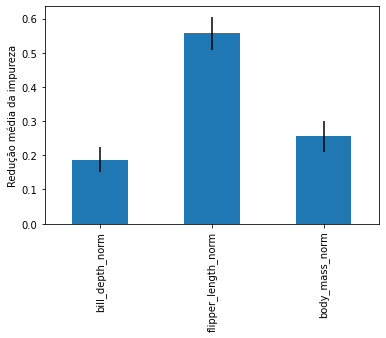

In [233]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

Observa-se acima que a característica de maior importância nos dados de treino é o comprimento das nadadeiras (`flipper_length_norm`). 
## Medindo a importância das features usando a técnica de permutação de atributos

In [235]:
from sklearn.inspection import permutation_importance

N_REPETICOES = 10

def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = X_treino
y_local = y_treino

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES[i]:<8} "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.9843374956084523

flipper_length_norm 0.181 +/- 0.018
body_mass_norm 0.073 +/- 0.004
bill_depth_norm 0.051 +/- 0.003


Observa-se acima que, novamente, que a característica de maior contribuição do valor de R2 é o comprimento da nadadeira (`flipper_length_norm`). Nota-se também que o R2 possui um ótimo valor; de 0.98, quando o melhor possível é de 1.
A seguir, partimos para essa mesma análise, dessa vez em relação aos dados de teste:

In [240]:
X_local = X_teste
y_local = y_teste

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES[i] :<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.8890321837871212

flipper_length_norm0.123 +/- 0.036


Observa-se novamente a mesma situação; a característica mais relevante é a mesma; `flipper_length_norm`. As duas outras características em questão foram omitidas por não terem muita importância, uma vez que não cumprem a condição no código 

    if r.importances_mean[i] - 2 * r.importances_std[i] > 0`

# Referências:
   
    [1] Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
    Archipelago (Antarctica) penguin data. R package version 0.1.0.
    https://allisonhorst.github.io/palmerpenguins/. doi:
    10.5281/zenodo.3960218.
    
    [2] How to Calculate Skewness and Kurtosis in Python? (2022,
    february 17). GeeksforGeeks.
    https://www.geeksforgeeks.org/how-to-calculate-skewness-and-kurtosis-in-python/

    [3] Using Statistics: Understand Population Distributions. (2014, julho 21).
    Analytics Vidhya. https://www.analyticsvidhya.com/blog/2014/07/statistics/
